In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanke\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

### 1. Fetch CSV data.

In [3]:
data = pd.read_csv("IMDB_dataset.csv")
data.shape

(6104, 2)

In [4]:
data.head(5)

,review,sentiment
0,I thought this was a wonderful way to spend ti...,positive
1,"Probably my all-time favorite movie, a story o...",positive
2,I sure would like to see a resurrection of a u...,positive
3,"This show was an amazing, fresh & innovative i...",negative
4,Encouraged by the positive comments about this...,negative


In [5]:
sentiment_initial_data = data['sentiment']
review_initial_data = data['review']

### 2. Label the sentiment text

In [6]:
lb=LabelBinarizer()

sentiment_data=lb.fit_transform(data['sentiment'])
data['sentiment'] = sentiment_data
data.to_csv("IMDb_out.csv", sep='\t', encoding='utf-8')

### 3. Plotting visualizations

### i) Pie chart

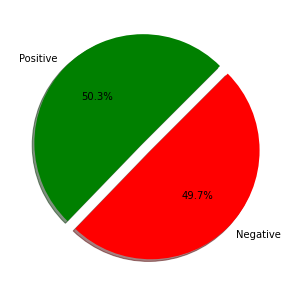

In [7]:
fig = plt.figure(figsize=(5,5))
colors = ['green','red']
pos = data[data['sentiment']==1]
neg = data[data['sentiment']==0]
ck = [pos['sentiment'].count(),neg['sentiment'].count()]
piechart = plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

### ii) Word Cloud

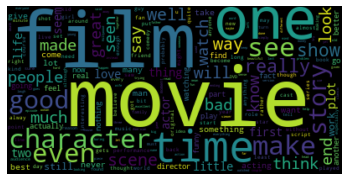

In [8]:
text = ''.join(review_initial_data)
    
CLEANR = re.compile('<.*?>')
cleantext = re.sub(CLEANR, '', text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(cleantext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 4. Git code link - https://github.com/sanketsborkar/sentiment_analysis

### 5. Library used - nltk (Natural Language Toolkit)

### 6. Conclusion:

- Looking at the above pie chart, we can infer that the reviews providing a positive and negative sentiment are present almost equally.
- Also, we can observe that words like "movie","film","character","one","good","make","see","even","time" are very frequently used while giving a review. 